In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

# EJEMPLO CON DATOS CONTROLADOS PARA PROBAR NUESTRA REGRESIÓN LINEAL SIMPLE

<Axes: >

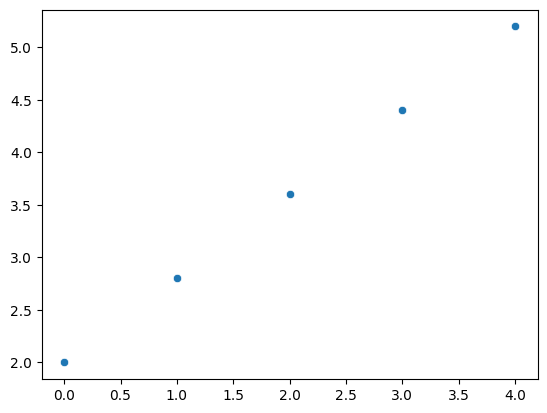

In [2]:
x = np.array([0,1,2,3,4])
y = np.array([2,2.8,3.6,4.4,5.2])
sns.scatterplot(x=x,y=y)

## CORRELACION

In [7]:
np.corrcoef(x,y)

array([[1., 1.],
       [1., 1.]])

## REGRESION LINEAL SIMPLE

In [4]:
result = scipy.stats.linregress(x,y)
result

LinregressResult(slope=0.8, intercept=2.0, rvalue=0.9999999999999999, pvalue=1.4044551538035188e-24, stderr=6.882551541204761e-09, intercept_stderr=1.6858739404357616e-08)

In [8]:
print(f'pendiente (slope) : {result.slope}')
print(f'intercepto(valor de y cuando x es 0) : {result.intercept}')
print(f'coeficiente de correlación (rvalue) : {result.rvalue}')

pendiente (slope) : 0.8
intercepto(valor de y cuando x es 0) : 2.0
coeficiente de correlación (rvalue) : 0.9999999999999999


𝑦
=
𝑚
𝑥
+
𝑏


donde:


1. m es la pendiente (slope)
2. b es el intercepto (intercept)
3. x es el valor nuevo para el cual quieres predecir

In [10]:
m = result.slope
b = result.intercept

HAGAMOS UNA PREDICCIÓN

In [11]:
x_new = 5

y_pred = m * x_new + b
print(f'cuando x = {x_new} : y = {y_pred}')

cuando x = 5 : y = 6.0


GRAFICAMOS NUESTRA REGRESIÓN LINEAL

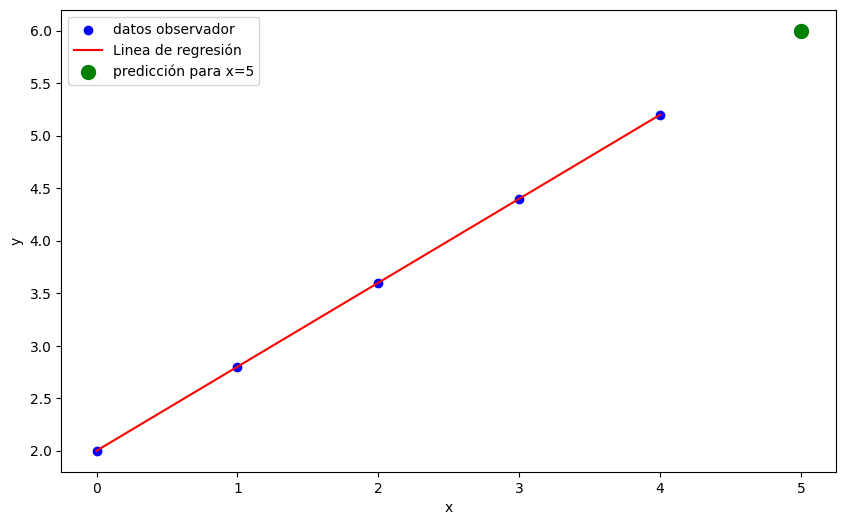

In [17]:
y_pred_x = m * x + b
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='blue',label='datos observador')
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x,y_pred_x,color='red',label='Linea de regresión')
plt.scatter(x_new,y_pred,color='green',marker='o',s=100,label=f'predicción para x={x_new}')

plt.legend()
plt.show()